# Final Project: House Sales in King County, USA

## Question 1
Display the data types of each column using the function `dtypes`. Take a screenshot of your code and output.

In [5]:

import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/Acheteur/Desktop/CERTIFICAT/INTROP/projet en payhton/kc_house_data.csv.zip")

# Display data types
df.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Question 2
Drop the columns `id` and `Unnamed: 0` from axis 1 using the method `drop()`. Then use the method `describe()` to obtain a statistical summary of the data.

In [13]:

# Drop unnecessary columns
df.drop(['id'], axis=1, inplace=True)

# Display statistical summary
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Question 3
Use the method `value_counts` to count the number of houses with unique floor values. Convert it to a DataFrame using `.to_frame()`.

In [15]:

# Count unique floor values and convert to DataFrame
floor_counts = df['floors'].value_counts().to_frame()

# Display floor counts
floor_counts


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


## Question 4
Use the function `boxplot` in the seaborn library to determine if houses with or without a waterfront view have more price outliers.

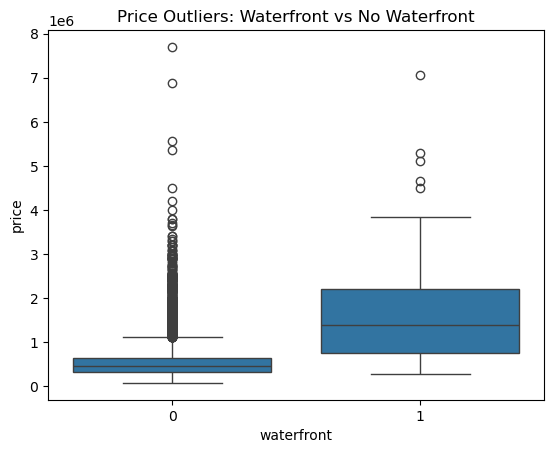

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplot for waterfront view
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Outliers: Waterfront vs No Waterfront')
plt.show()


## Question 5
Use the function `regplot` in the seaborn library to determine if the feature `sqft_above` is negatively or positively correlated with price.

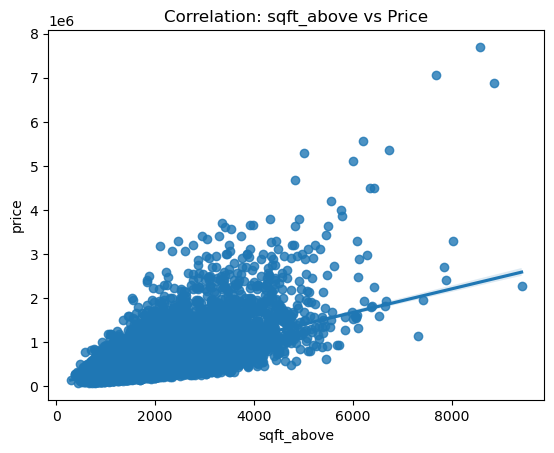

In [20]:

# Create regression plot for sqft_above vs price
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Correlation: sqft_above vs Price')
plt.show()


## Question 6
Fit a linear regression model to predict `price` using the feature `sqft_living` and calculate the R² value.

In [22]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare data
X = df[['sqft_living']]
y = df['price']

# Fit linear regression model
lm = LinearRegression()
lm.fit(X, y)

# Predict and calculate R²
y_pred = lm.predict(X)
r2 = r2_score(y, y_pred)
r2


0.4928532179037931

## Question 7
Fit a linear regression model to predict `price` using multiple features and calculate the R² value.

In [24]:

# Define multiple features for prediction
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors']
X = df[features]

# Fit linear regression model
lm.fit(X, y)

# Predict and calculate R²
y_pred = lm.predict(X)
r2_multi = r2_score(y, y_pred)
r2_multi


0.5069198616689737

## Question 8
Create a pipeline to predict `price` using polynomial features and calculate the R² value.

In [26]:

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create pipeline
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Fit pipeline and calculate R²
pipeline.fit(X, y)
y_pred = pipeline.predict(X)
r2_pipeline = r2_score(y, y_pred)
r2_pipeline


0.547181394297581

## Question 9
Create and fit a Ridge regression object using training data, set regularization parameter to 0.1, and calculate the R² value using test data.

In [28]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict and calculate R²
y_pred_test = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_test)
r2_ridge


0.49571063089525347

## Question 10
Perform a second-order polynomial transform, fit a Ridge regression model, and calculate the R² value using test data.

In [37]:

from sklearn.preprocessing import StandardScaler

# Standardiser les données d'entraînement et de test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Appliquer la transformation polynomiale
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge_model = Ridge(alpha=1.0)  # Augmenter alpha
ridge_model.fit(X_train_poly, y_train)

# Prédire et calculer R²
y_pred_test_poly = ridge_model.predict(X_test_poly)
r2_ridge_poly = r2_score(y_test, y_pred_test_poly)
print(r2_ridge_poly)


0.5332528036510327
